# Module 1 - Simple Plots

* [Intro](#Introduction)
* [First plots](#First-plots)
* [Setting asthetics](#Setting-asthetetics,-context,-theme)
* [Add pvalues](#Add-pvalues)
* [Add standard Errors](#Add-standard-Errors)
* [Split plots per category values](#Split-plots)
* [Organize subplots in figure](#Organize-subplots-in-figure)
* [Stacked/Dodge Histogram](#Histogram)

___


## Introduction

We will work with [seaborn](https://seaborn.pydata.org/index.html) build on top of Matplolib.

There is many plots we can do as describe [here](https://seaborn.pydata.org/examples/index.html)

We will not cover all of them.

| Function  | Description |
| ------------- | ------------- |
| boxplot | Draw a box plot to show distributions with respect to categories |
| kdeplot | Plot univariate or bivariate distributions using kernel density estimation. |
| stripplot | Draw a scatterplot where one variable is categorical. |
| histplot | Plot univariate or bivariate histograms to show distributions of datasets. |
|  |  |
| catplot | Figure-level interface for drawing categorical plots onto a FacetGrid.|
| displot | Figure-level interface for drawing distribution plots onto a FacetGrid. |
| relplot | Figure-level interface for drawing relational plots onto a FacetGrid.  |


Import the libraries.  
Load the iris dataset. 
___


In [223]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

#print(sns.get_dataset_names())

sns.set_theme(style="whitegrid")

# Load the dataset
dataframe = sns.load_dataset("iris")

dataframe.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


___
## First-plots

<span style="color:blue">Questions/ToDo : </span>

Try to plot 3 different plots, anything you want.  
Take examples from the sneaborn library.  
Then we will try to customize them.  
____

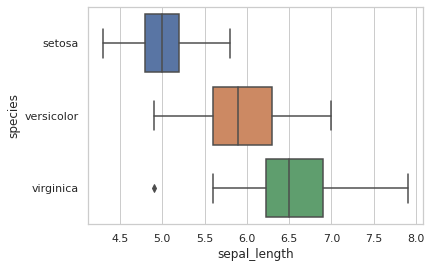

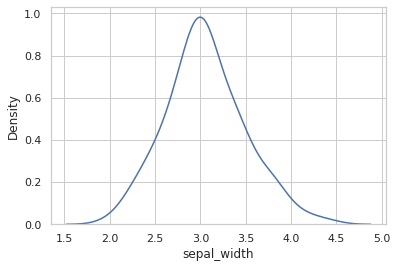

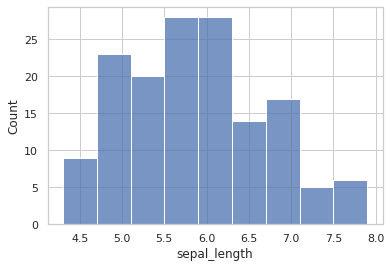

In [224]:
sns.boxplot(x='sepal_length',y='species',data=dataframe)
plt.show()
sns.kdeplot(x=dataframe['sepal_width'])
plt.show()
sns.histplot(x="sepal_length",data=dataframe)
plt.show()


___
## Setting-asthetetics,-context,-theme

<span style="color:blue">Questions/ToDo : </span>


1 - Set the parameters that control the scaling of plot elements.

This affects things like the size of the labels, lines, and other elements of the plot, but not the overall style.   
The base context is “notebook”, and the other contexts are “paper”, “talk”, and “poster”  

2 - Try to play around the figure aesthetics.It's another set function...
___



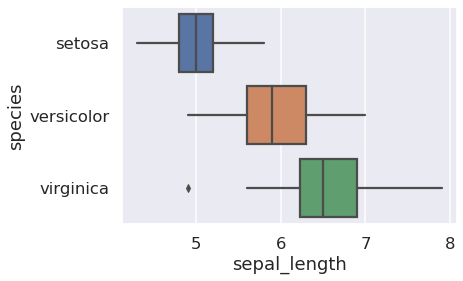

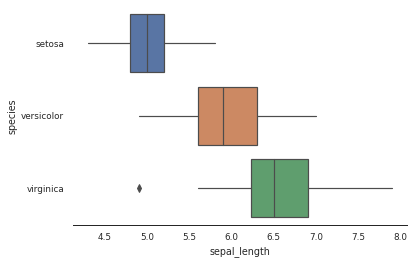

In [225]:
sns.set_theme(style="darkgrid") #whitegrid white
sns.set_context("talk") # 
sns.boxplot(x='sepal_length',y='species',data=dataframe,showcaps=False)
plt.savefig('./figure/notebook.png', dpi=300)
plt.show()

sns.set_theme(style="white")
sns.set_context("paper")  
sns.boxplot(x='sepal_length',y='species',data=dataframe,showcaps=False)
sns.despine(left=True,right=True)
plt.savefig('./figure/paper.png', dpi=300)
plt.show()


___
## Add pvalues

<span style="color:blue">Questions/ToDo : </span>


There is a package to add Pval that is good to know...
Find it, Try to add pvals to your figure.

T-test to compare normal two distributions.  
Wilcoxon-Mann-Withney to compare two distributions (the non parametric way).    
Kruskall-Wallis to compare more than 2 distributions.  

Also try to add the points over the boxplot. Notice that calling sns function ploting in the same flow will overlap the output layers in a final figure.  
___

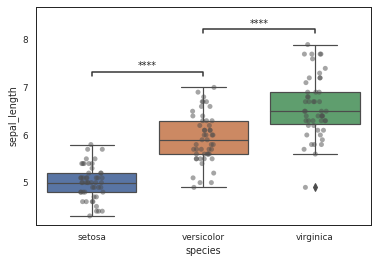

In [226]:
from statannot import add_stat_annotation


order = ['setosa', 'versicolor', 'virginica']
ax = sns.boxplot(x='species',y='sepal_length',order=order,data=dataframe)

test_results = add_stat_annotation(ax, data=dataframe, x='species', y='sepal_length', order=order,
                                   box_pairs=[("setosa", "versicolor"),("versicolor", "virginica")],
                                   test='Mann-Whitney', text_format='star',
                                   loc='inside', verbose=0)

sns.stripplot(x="species", y="sepal_length", data=dataframe, color=".3",alpha=0.5)
plt.show()

___

## Add-standard-Errors
__

<span style="color:blue">Questions/ToDo : </span>


Load the dataset "exercise" from sns.  
Play with catplot function.  
This is an interface between several plots (barplot, boxplot etc)
[Read this](https://seaborn.pydata.org/tutorial/categorical.html#categorical-tutorial)



   Unnamed: 0  id     diet  pulse    time  kind
0           0   1  low fat     85   1 min  rest
1           1   1  low fat     85  15 min  rest
2           2   1  low fat     88  30 min  rest
3           3   2  low fat     90   1 min  rest
4           4   2  low fat     92  15 min  rest


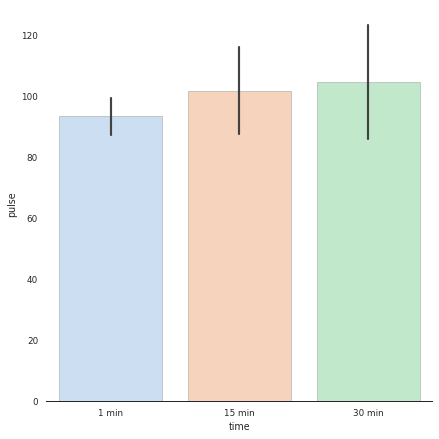

   id     diet  pulse    time  kind
0   1  low fat     85   1 min  rest
1   1  low fat     85  15 min  rest
2   1  low fat     88  30 min  rest
3   2  low fat     90   1 min  rest
4   2  low fat     92  15 min  rest


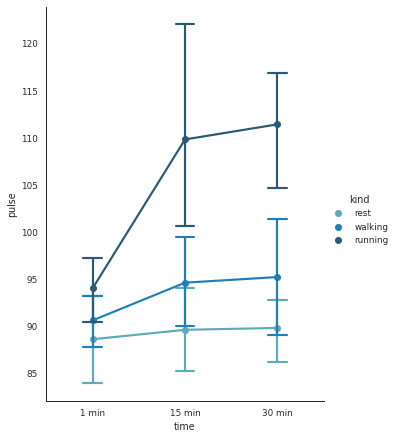

In [227]:
# Load the example exercise dataset
df = sns.load_dataset("exercise")
print(df.head())
df = df.drop(['Unnamed: 0'], axis=1) # Remove column

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=df, kind="bar",
    x="time", y="pulse",
    ci="sd", palette="pastel", alpha=.6, height=6,edgecolor=".6"
)
g.despine(left=True)
plt.show()


df = df.loc[df.diet=="low fat"] # filter
print(df.head())

# Draw a pointplot to show pulse as a function of three categorical factors
sns.catplot(x="time", y="pulse", hue="kind",capsize=.2, palette="YlGnBu_d", height=6, aspect=.75,
                kind="point", data=df)
g.despine(left=True)
plt.show()


          

___
## Split-plots

<span style="color:blue">Questions/ToDo : </span>

Load the penguins dataset.

Plot the _flipper_length_mm_ by species.  
Separate  the figure in two plots using sex values (Male/Femelle).    
Plot with _sns.catplot_ but change the type of figure that is plotted (boxplot to swarmplot for example).


Try to add the following parameters  : hue kind & col.  
What are they doing ?  

Which species come from a different island ?


 <span style="color:orange">Answers : </span>

**hue** : Grouping variable that will produce elements with different colors. Can be either categorical or numeric, although color mapping will behave differently in latter case.

**kind** :Kind of plot to draw, corresponding to a seaborn relational plot. Options are 
{scatter and line } for _sns.replot_.

**col** :Variables that define subsets to plot on different facets. (Note: col parameter doesn't work if you don't use an interface call.


For another interface plotting function like _sns.catplot_, you will find several other options : 

stripplot() (with kind="strip"; the default)   
swarmplot() (with kind="swarm")  
boxplot() (with kind="box")  
violinplot() (with kind="violin")  
boxenplot() (with kind="boxen")   
pointplot() (with kind="point")  
barplot() (with kind="bar")  
countplot() (with kind="count") 


___


  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  


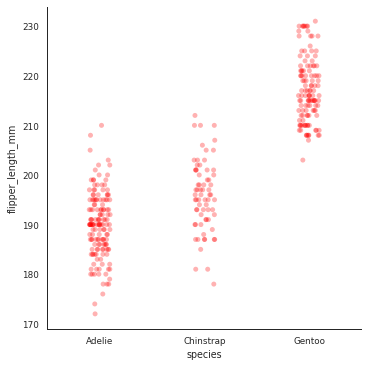

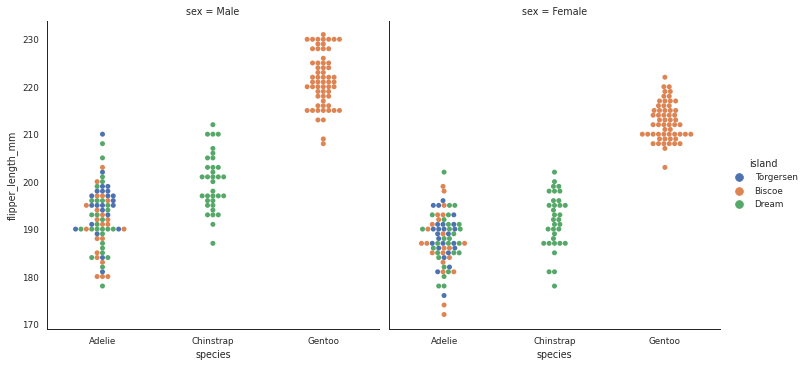

In [228]:
penguins = sns.load_dataset("penguins")

print(penguins.head())
sns.catplot(x="species", y="flipper_length_mm" ,color="red",alpha=0.3,data=penguins)
sns.catplot(x="species", y="flipper_length_mm",hue='island', kind="swarm",col="sex", data=penguins)
plt.show()


___

## Organize subplots in figure

<span style="color:blue">Questions/ToDo : </span>


Declare the figure with the subplots and axes.  

Axes are an array with each subplot.  

Set the size of your figure.  

We will see in Module 2 that we can do more complex combination of plots.
___


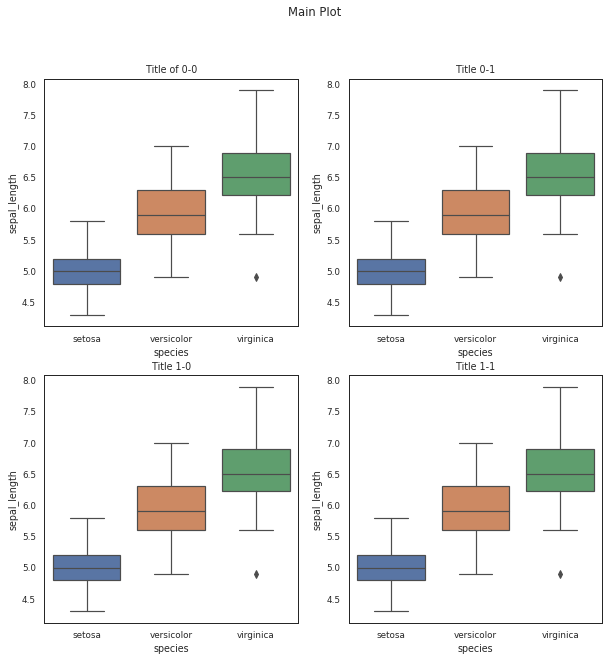

In [229]:

# Load the dataset
dataframe = sns.load_dataset("iris")

dataframe.head()

fig, axes = plt.subplots(2, 2,figsize=(10,10))

sns.boxplot(x='species',y='sepal_length',data=dataframe,ax=axes[0,0])
sns.boxplot(x='species',y='sepal_length',data=dataframe,ax=axes[0,1])
sns.boxplot(x='species',y='sepal_length',data=dataframe,ax=axes[1,0])
sns.boxplot(x='species',y='sepal_length',data=dataframe,ax=axes[1,1])

# You also can plot this in the flow without giving ax values.
axes[0,0].set_title('Title of 0-0')
axes[0,1].set_title('Title 0-1')
axes[1,0].set_title('Title 1-0')
axes[1,1].set_title('Title 1-1')

plt.suptitle("Main Plot")
plt.savefig('./figure/FusionPlots.png', dpi=300)

plt.show()

## Histogram

<span style="color:blue">Questions/ToDo : </span>

Just a quick note for the different histogram you can have.    
Do you know what is a stacked or dodge histogram ?

Try also the _multiple_ parameter for histogram.

**multiple** : {“layer”, “dodge”, “stack”, “fill”}
Approach to resolving multiple elements when semantic mapping creates subsets.   Only relevant with univariate data.

**stat** : Aggregate statistic to compute in each bin.

<u>count</u>: show the number of observations in each bin  
<u>frequency</u>: show the number of observations divided by the bin width  
<u>probability</u>: or proportion: normalize such that bar heights sum to 1  
<u>percent</u>: normalize such that bar heights sum to 100  
<u>density</u>: normalize such that the total area of the histogram equals 1  



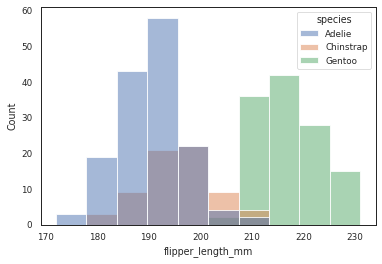

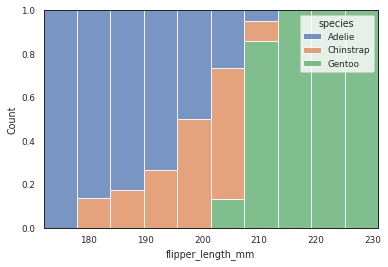

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


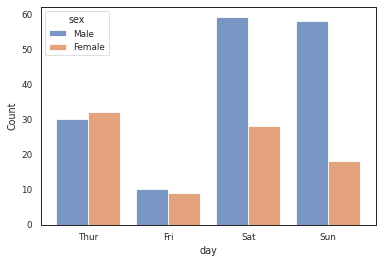

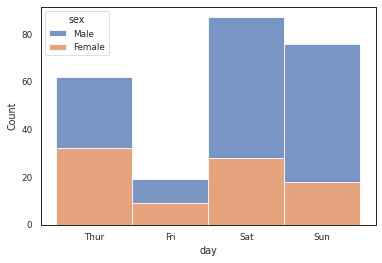

In [231]:
# Load the example penguins dataset
penguins = sns.load_dataset("penguins")

# Default
sns.histplot(data=penguins, x="flipper_length_mm", hue="species")
plt.show()

sns.histplot(data=penguins, x="flipper_length_mm", hue="species",multiple="fill")
plt.show()

# Load the example tips dataset
tips = sns.load_dataset("tips")
print(tips.head())
sns.histplot(data=tips, x="day", hue="sex", multiple="dodge", shrink=.8)
plt.show()
sns.histplot(data=tips, x="day", hue="sex", multiple="stack")
plt.show()